In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import the Data

In [2]:
df = pd.read_json('ultimate_data_challenge.json')
logins = pd.read_json('logins.json')

# Part 1 - EDA On User Login Activity

#### Sort the login data and add an "Event" column that can be used to aggregate the data

In [3]:
sorted_logins = logins.sort_values(by='login_time', ascending = True)

In [4]:
sorted_logins.set_index(sorted_logins.login_time, inplace=True)
sorted_logins['event'] = 1
#sorted_logins['weekday'] = sorted_logins['login_time'].apply(lambda stamp : stamp.isoweekday())
#sorted_logins.drop(columns=['login_time'])

In [5]:
sorted_logins.head()

,login_time,event
login_time,,
1970-01-01 20:12:16,1970-01-01 20:12:16,1
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1


#### Group the data into 15 minute bins, add context via new features

In [6]:
grouped_logins = sorted_logins.resample('15T').sum()
#grouped_logins = sorted_logins.resample("15min", on="login_time").count()
grouped_logins.head()
grouped_logins= grouped_logins.reset_index()
grouped_logins['weekday'] = grouped_logins['login_time'].apply(lambda stamp : stamp.day_name())
grouped_logins.weekday.unique()
day_type_map = np.where((grouped_logins.weekday == 'Saturday')|(grouped_logins.weekday == 'Sunday'),
    'weekend', 'weekday')
grouped_logins['day_type'] = day_type_map

#extract the hour and minute into a separate dataframe column
grouped_logins['timestamp'] = grouped_logins.login_time.apply(lambda login: login.time())
grouped_logins['hour']      = grouped_logins.timestamp.apply(lambda x: x.hour)
grouped_logins['minute']    = grouped_logins.timestamp.apply(lambda x: x.minute)

grouped_logins.head()

,login_time,event,weekday,day_type,timestamp,hour,minute
0,1970-01-01 20:00:00,2,Thursday,weekday,20:00:00,20,0
1,1970-01-01 20:15:00,6,Thursday,weekday,20:15:00,20,15
2,1970-01-01 20:30:00,9,Thursday,weekday,20:30:00,20,30
3,1970-01-01 20:45:00,7,Thursday,weekday,20:45:00,20,45
4,1970-01-01 21:00:00,1,Thursday,weekday,21:00:00,21,0


In [7]:
grouped_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   event       9788 non-null   int64         
 2   weekday     9788 non-null   object        
 3   day_type    9788 non-null   object        
 4   timestamp   9788 non-null   object        
 5   hour        9788 non-null   int64         
 6   minute      9788 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 535.4+ KB


<AxesSubplot:xlabel='event', ylabel='Count'>

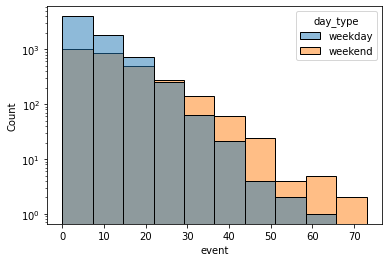

In [9]:
sns.histplot(data=grouped_logins, x='event',  hue='day_type',log_scale = [0, 10],bins=10  )

#### Split off a weekend and weekday dataframe

In [10]:
weekend = grouped_logins.loc[grouped_logins.day_type == 'weekend']
weekday = grouped_logins.loc[grouped_logins.day_type == 'weekday']

In [11]:
total_weekday_riders = weekday.event.sum()
total_weekend_riders = weekend.event.sum()
print(total_weekday_riders)
print(total_weekend_riders)
total_weekend_riders/ (total_weekday_riders+total_weekend_riders)
total_weekday_riders/ (total_weekday_riders+total_weekend_riders)

55598
37544


0.5969165360417427

#### Visualize the mean logins by day and hour

In [28]:
average_df = grouped_logins.groupby(by=['weekday','hour']).mean()

In [29]:
average_df.head(4)


event  minute
weekday hour                   
Friday  0     16.250000    22.5
        1     15.950000    22.5
        2     12.850000    22.5
        3      8.366667    22.5

In [30]:
average_df.reset_index(inplace=True)

Text(0, 0.5, 'Average Event Counts')

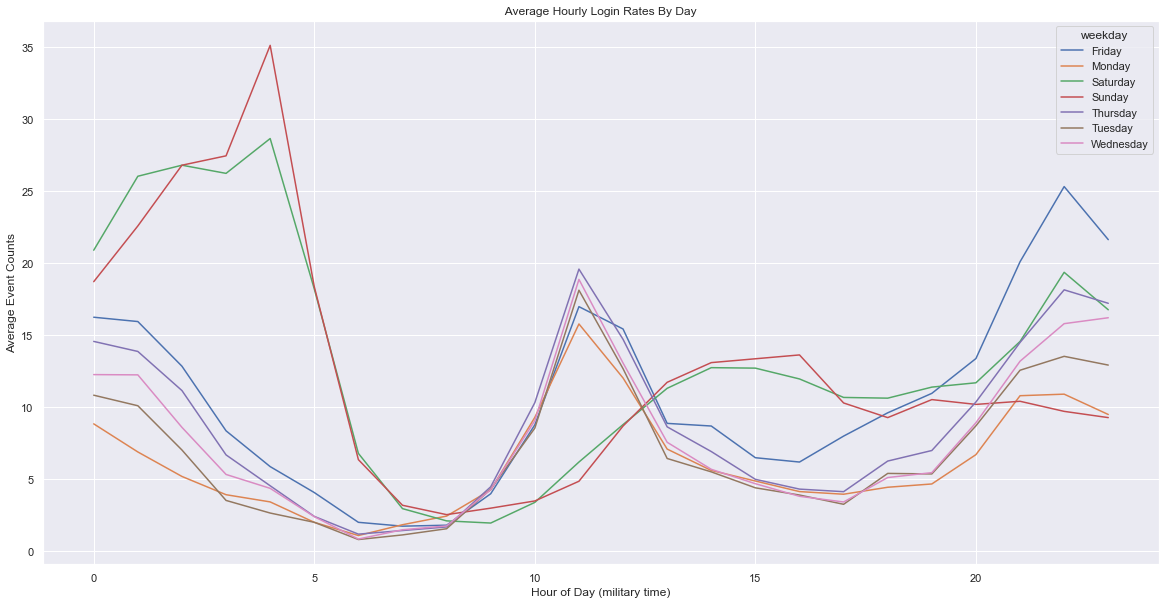

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(data=average_df, x='hour', y='event', hue='weekday')
plt.title(' Average Hourly Login Rates By Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Average Event Counts')

### Observation:
* Weekend Data
    * The average weekend login activity peaks between midnight and 5 am
    * The weekend data picks back up from 10 towards midnight
    
* Weekday Data
    * The average login activity spikes between 10am and 12pm (lunch time)
    * The average login activity picks up after 5pm towards midnight.
    
* Weekend login activity accounts for 40% of the total usage
* Weekday login activity accounts for 60% of the total usage


Text(0, 0.5, 'Event Counts')

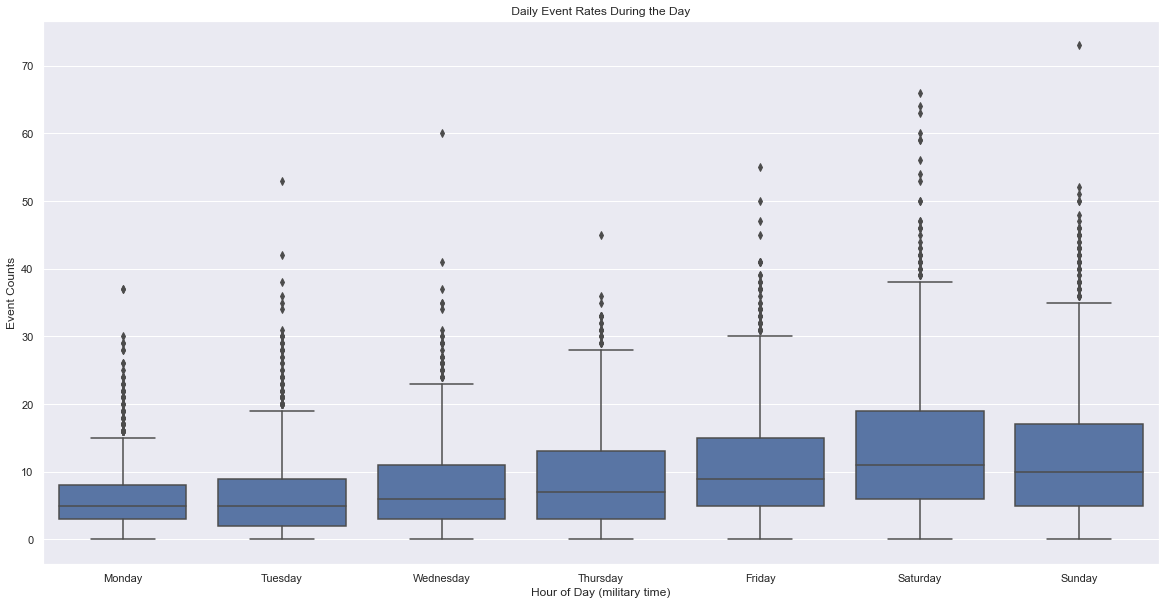

In [15]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=grouped_logins, x='weekday', y='event', color = 'b', order =['Monday', 'Tuesday', 'Wednesday',
                                                                              'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title(' Daily Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

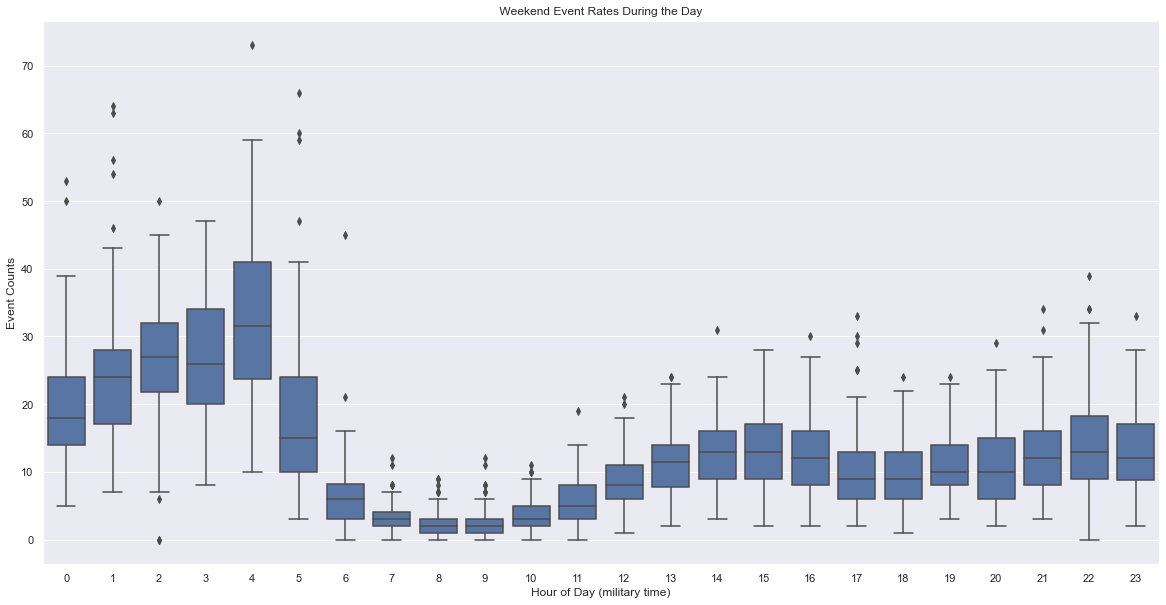

In [13]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=weekend, x='hour', y='event', color = 'b')
plt.title(' Weekend Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

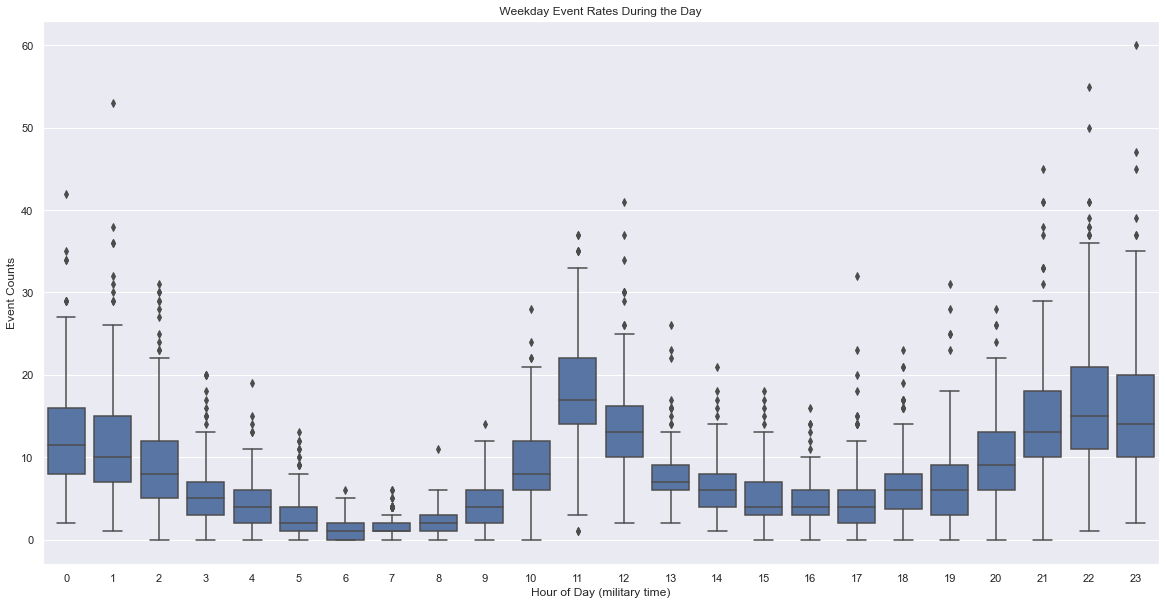

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=weekday, x='hour', y='event', color = 'b')
plt.title(' Weekday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

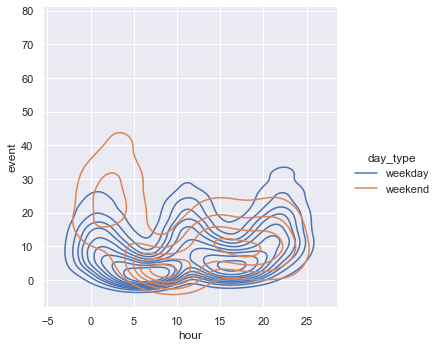

In [20]:
sns.displot(data=grouped_logins, y= 'event', x='hour', hue = 'day_type', kind='kde')

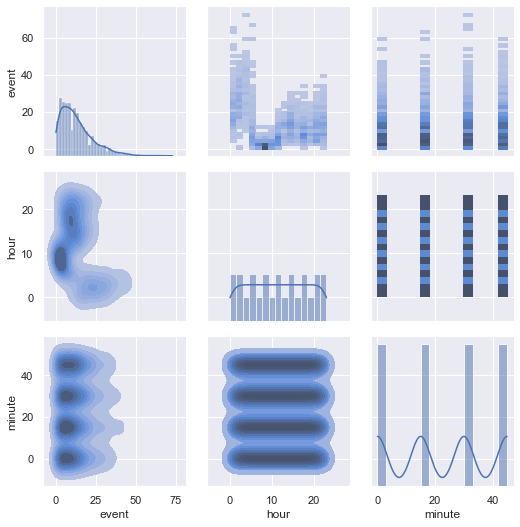

In [21]:
g = sns.PairGrid(weekend)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

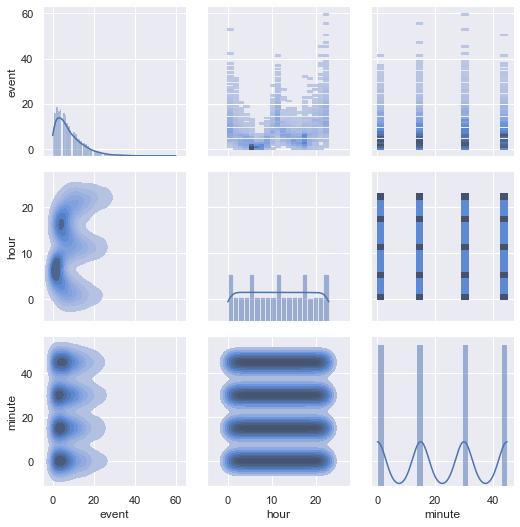

In [22]:
g = sns.PairGrid(weekday)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)